# Visualize Old/Reference dataset   

## Imports 

In [ ]:
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf
import random
import matplotlib.pyplot as plt
import plotly.express as px
import torch
from pprint import pprint
import pickle as pk, numpy as np, os
SEED = 17
random.seed(SEED)

In [ ]:
%load_ext autoreload
%autoreload 3

In [204]:
with initialize(version_base=None, config_path="../baselines/config"):
    cfg = compose(config_name="exo_input")
    OmegaConf.resolve(cfg)

In [ ]:
cfg

# input signal testing

In [206]:
from src.simulators.types import SimTime
sim_time = SimTime(0, 40, 0.01)
inp = instantiate(cfg.exo_input, _recursive_=False)

In [ ]:
x = inp.signal_objects['state_6'].generate_traj(sim_time)

In [ ]:
inp.signal_objects['state_3'].params.signal_data['system'].__class__.__name__


In [ ]:
# plot the signal the 3 dim  vs time
idx = 4
fig, ax = plt.subplots(1,1, figsize=(18,15))
ax.plot(x[idx, :, 0])
ax.plot(x[idx, :, 1])
ax.plot(x[idx, :, 2])
plt.show()

In [ ]:
# 3d plot
idx = 1
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[idx, :, 0], x[idx, :, 1], x[idx, :, 2])

In [208]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
state_keys = list(inp.signal_objects.keys())
outputs = [inp.signal_objects[state_key].generate_traj(sim_time) for state_key in state_keys]
classes = [inp.signal_objects[state_key].params.signal_data['system'].__class__.__name__ for state_key in state_keys]

4000it [00:00, 8797.40it/s]
4000it [00:00, 11726.50it/s]
4000it [00:00, 7912.07it/s] 
4000it [00:00, 10243.39it/s]
4000it [00:00, 7942.75it/s]
4000it [00:00, 9106.40it/s] 
4000it [00:00, 9910.60it/s] 
4000it [00:00, 6501.41it/s]
4000it [00:00, 8882.50it/s]
4000it [00:00, 5708.54it/s]
4000it [00:00, 7071.81it/s]
4000it [00:00, 7773.76it/s]
4000it [00:00, 6923.43it/s]
4000it [00:00, 6536.68it/s]
4000it [00:00, 7002.46it/s]
4000it [00:00, 8061.55it/s]
4000it [00:00, 6869.10it/s]
4000it [00:00, 8085.63it/s] 
4000it [00:00, 9383.11it/s] 
4000it [00:00, 9276.29it/s] 
4000it [00:00, 5864.91it/s]
4000it [00:00, 9454.42it/s]
4000it [00:00, 7669.07it/s]
4000it [00:00, 7777.73it/s]
4000it [00:00, 9491.13it/s]
4000it [00:00, 5152.53it/s]
4000it [00:00, 6746.93it/s]
4000it [00:00, 7530.26it/s]
4000it [00:00, 7624.36it/s]
4000it [00:00, 6632.06it/s]


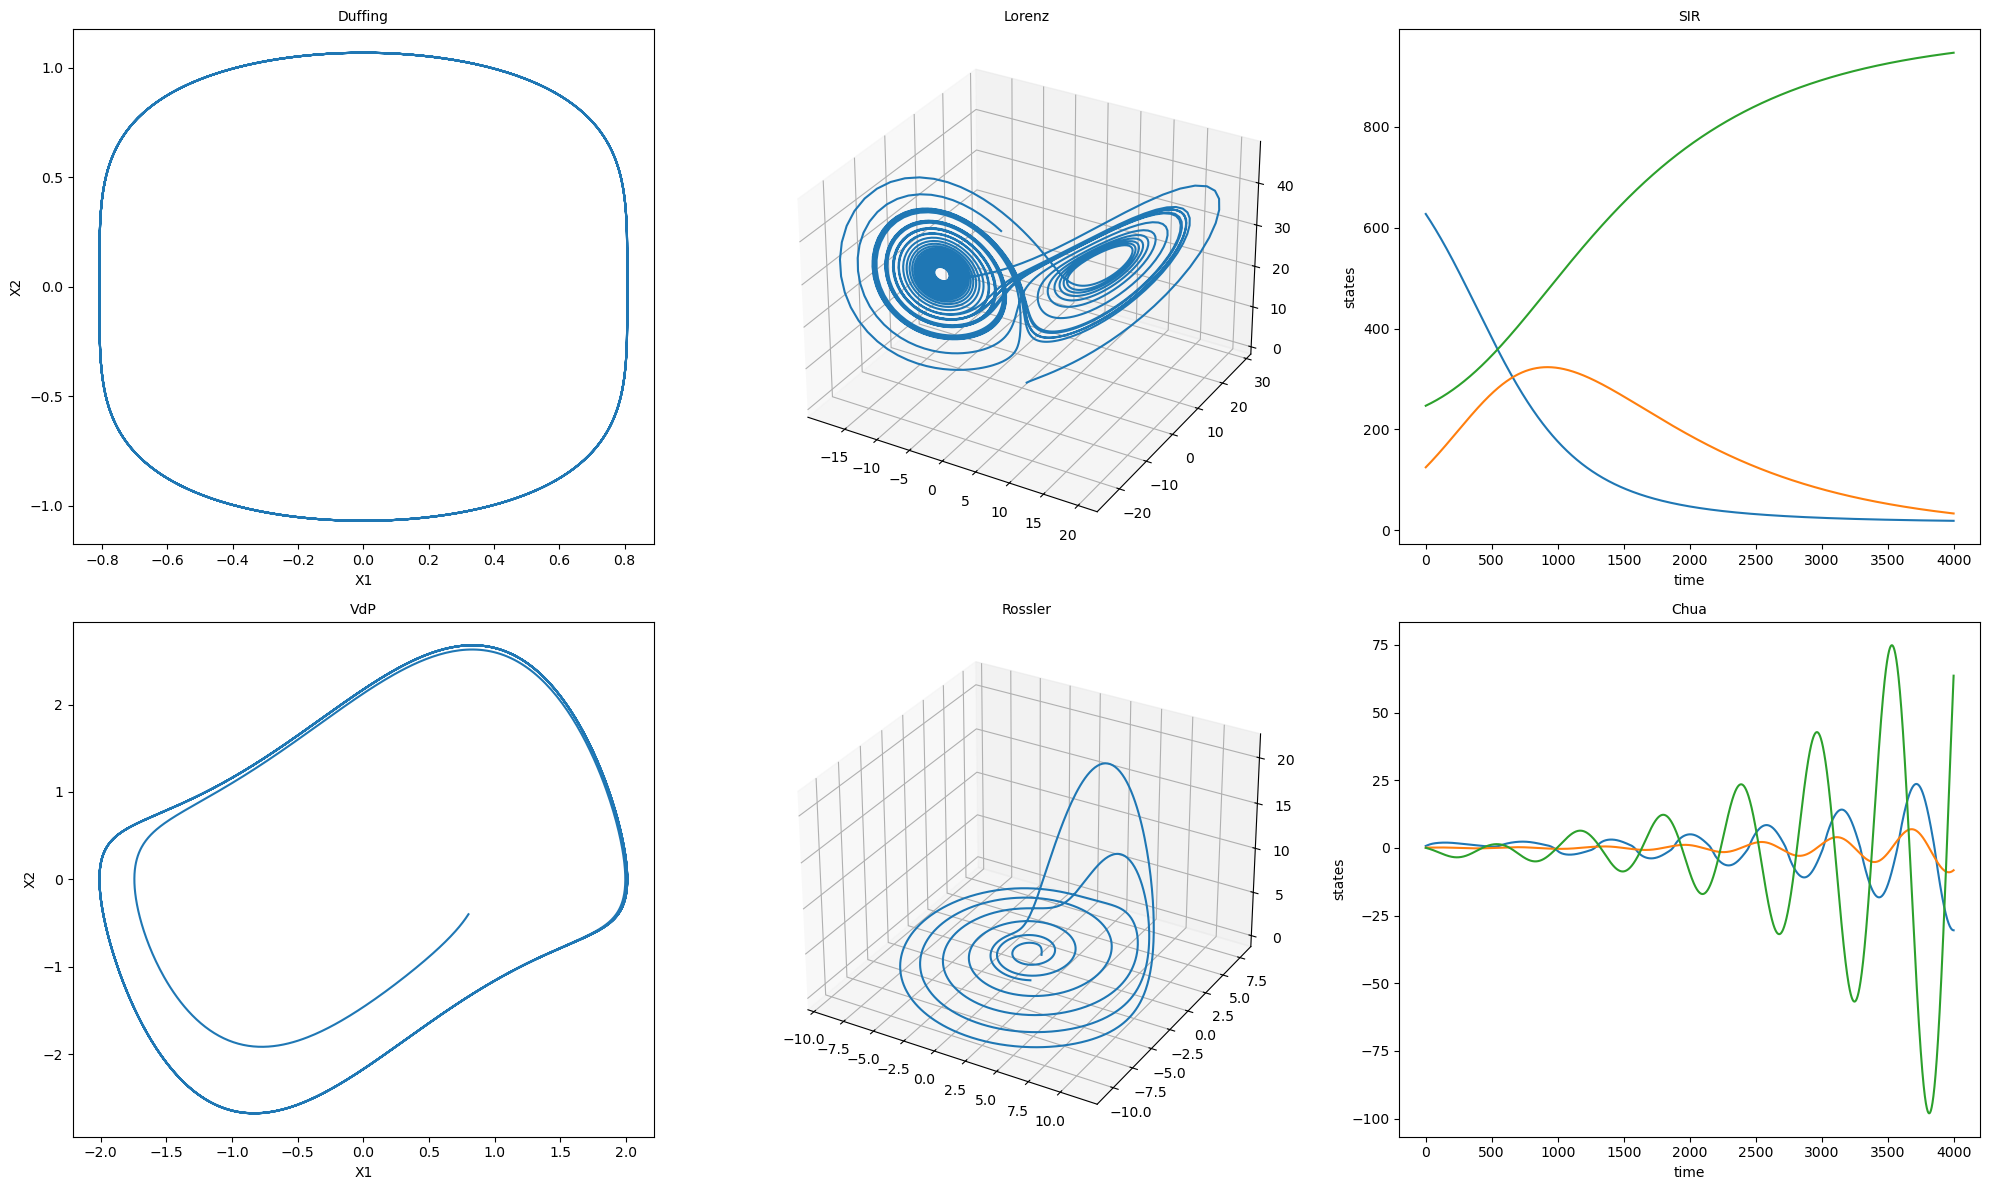

In [219]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
# Flatten the 2D array of axes for easier iteration
axs = axs.flatten()
idx =1
for i,( state_key, x , class_name)in enumerate(zip(state_keys, outputs, classes)):
    if x.shape[2] == 3:  # Check if the last dimension is 3 for a 3D plot
        if class_name in ['SIR', 'Chua']:
            axs[i].plot(x[idx, :, 0])
            axs[i].plot(x[idx, :, 1])
            axs[i].plot(x[idx, :, 2])
            axs[i].set_xlabel('time')
            axs[i].set_ylabel('states')
        else:
            axs[i].axis('off')
            ax = fig.add_subplot(2, 3, i + 1, projection='3d')
            ax.plot(x[idx, :, 0], x[idx, :, 1], x[idx, :, 2])
    elif x.shape[2] == 2:  # Check if the last dimension is 2 for a 2D plot
        axs[i].plot(x[idx, :, 0], x[idx, :, 1])
        axs[i].set_xlabel('X1')
        axs[i].set_ylabel('X2')
    axs[i].set_title(f'State {i+1}')
    axs[i].set_title(class_name, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# inp.shape is (n,t,d), plot each d p
fig, ax = plt.subplots(1,1, figsize =(18,15))
for dim in range(inp.shape[2]):
    ax.plot(inp[0,generate_trajs :, 2])

## Opening files

In [ ]:
old_ds_path = '/media/yehias21/DATA/projects/Work/KKL observer/hyperkkl/data/Duffing/reference_dataset.pkl'
with open(old_ds_path, 'rb') as f:
    x_old_data, z_old_data, y_old_data, t_old_data, _ = pk.load(f)


In [ ]:
# print the shape of each attribute
print('x_shapes', x_old_data.shape)
print('z_shapes', z_old_data.shape)
print('y_shapes', y_old_data.shape)
print('t_shapes', t_old_data.shape)


## Visualization of each variable

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(18,15))
states, states_sim = ['x_states', 'z_states', 'Y_out'], [x_old_data, z_old_data,y_old_data]

for idx, (name, trajs) in enumerate(zip(states, states_sim)):
    ax[idx].set_title(name)
    traj = random.choice(trajs)
    if traj.ndim > 1:  # If trajectory has multiple dimensions
        for dim in range(traj.shape[1]):
            ax[idx].plot(traj[:, dim])
    else:
        ax[idx].plot(traj)

plt.tight_layout()
plt.show()

### Phase plot of the x_States

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Phase Plot for x_data_old")
traj = random.choice(x_old_data)
plt.plot(traj[:, 0], traj[:, 1], '.')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

# Visualize New Dataset w/o Input

In [ ]:
path_no_inp = '/media/yehias21/DATA/projects/Work/KKL observer/hyperkkl/data/2024-06-23/18-07-42/train_wo_inp.pth'
with open(path_no_inp,'rb') as f:
    ds_no_inp = torch.load(f)
ds_no_inp.__dict__.keys()

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(18,15))
states, states_sim = ['x_states', 'z_states', 'Y_out'], [ds_no_inp.x_states['x_regress'], ds_no_inp.z_states['z_regress'], ds_no_inp.y_out['y_regress']]
for idx, (name, trajs) in enumerate(zip(states, states_sim)):
    ax[idx].set_title(name)
    trajs = np.squeeze(trajs)
    print(trajs.shape)
    traj = random.choice(trajs)
    if traj.ndim > 1:  # If trajectory has multiple dimensions
        for dim in range(traj.shape[1]):
            ax[idx].plot(traj[:, dim])
    else:
        ax[idx].plot(traj)

plt.tight_layout()
plt.show()
with rasterio.open(crops_path) as crop_src, rasterio.open(masks_path) as mask_src:
            crops = crop_src.read([7,5,3]).astype(np.float32).transpose(1, 2, 0)
            masks = mask_src.read([1,2,3]).transpose(1, 2, 0)
        

In [ ]:
def a7a():
    x = [ i for i in range(10)]
    for z in x:
        yield z

for i in a7a():
    print(i)
    

## State space

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
traj = random.choice(np.squeeze(ds_no_inp.x_states['x_regress']))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], lw=0.5)

ax.set_title("3D Lorenz Attractor")
ax.set_xlabel("Dimension 1 (x)")
ax.set_ylabel("Dimension 2 (y)")
ax.set_zlabel("Dimension 3 (z)")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Phase Plot for x_data_old")
traj = random.choice(np.squeeze(ds_no_inp.x_states['x_regress']))
plt.plot(traj[:, 0], traj[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

# Data visualization with input #1 -- EASY INPUT 

In [ ]:
path_w_inp = '//media/yehias21/DATA/projects/Work/KKL observer/hyperkkl/data/2024-05-06/17-02-33/train_inp.pth'
with open(path_w_inp,'rb') as f:
    ds_inp = torch.load(f)
ds_inp.__dict__.keys()

In [ ]:
# print the shape of each attribute
print('x_shapes', ds_inp.x_states['x_regress'].shape)
print('z_shapes', ds_inp.z_states['z_regress'].shape)
print('y_shapes', ds_inp.y_out['y_regress'].shape)
print('inp_shapes', ds_inp.exo_input.shape)

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(18,15))
states, states_sim = ['x_states', 'z_states', 'Y_out', 'input'], [ds_inp.x_states['x_regress'], ds_inp.z_states['z_regress'], ds_inp.y_out['y_regress'], 
                                                                  ds_inp.exo_input]
for idx, (name, trajs) in enumerate(zip(states, states_sim)):
    ax[idx].set_title(name)
    if trajs.ndim==4:
        trajs = np.squeeze(trajs)
    print(trajs.shape)
    traj = random.choice(trajs)
    if traj.ndim > 1:  # If trajectory has multiple dimensions
        for dim in range(traj.shape[1]):
            ax[idx].plot(traj[:, dim])
    else:
        ax[idx].plot(traj)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Phase Plot for x_data_old")
traj = random.choice(np.squeeze(ds_inp.x_states['x_regress']))
plt.plot(traj[:, 0], traj[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

# Data visualization with input #2 --HARD INPUT

In [ ]:
path_w_inp = '/media/yehias21/DATA/projects/Work/KKL observer/hyperkkl/data/2024-05-06/22-24-29/train_wo_inp.pth'
with open(path_w_inp,'rb') as f:
    ds_inp = torch.load(f)
ds_inp.__dict__.keys()

In [ ]:
# print the shape of each attribute
print('x_shapes', ds_inp.x_states['x_regress'].shape)
print('z_shapes', ds_inp.z_states['z_regress'].shape)
print('y_shapes', ds_inp.y_out['y_regress'].shape)
print('inp_shapes', ds_inp.exo_input.shape)

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(18,15))
states, states_sim = ['x_states', 'z_states', 'Y_out', 'input'], [ds_inp.x_states['x_regress'], ds_inp.z_states['z_regress'], ds_inp.y_out['y_regress'], 
                                                                  ds_inp.exo_input]
for idx, (name, trajs) in enumerate(zip(states, states_sim)):
    ax[idx].set_title(name)
    if trajs.ndim==4:
        trajs = np.squeeze(trajs)
    print(trajs.shape)
    traj = random.choice(trajs)
    if traj.ndim > 1:  # If trajectory has multiple dimensions
        for dim in range(traj.shape[1]):
            ax[idx].plot(traj[:, dim])
    else:
        ax[idx].plot(traj)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Phase Plot for x_data_old")
traj = random.choice(np.squeeze(ds_inp.x_states['x_regress']))
plt.plot(traj[:, 0], traj[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()